In [1]:
import sys
# !{sys.executable} -m pip install obspy
!{sys.executable} -m pip install cartopy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 3.5 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 2.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 1.9 MB/s eta 0:00:0000:0100:01
  error: subprocess-exited-with-error
  
  × Building wheel for cartopy (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [287 lines of output]
      <string>:90: UserWarning: Unable to determine GEOS version. Ensure you have 3.7.2 or later installed, or installation may fail.
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.macosx-10.9-universal2-cpython-311
      creating build/lib.macosx-10.9-universal2-cpython-311/cartopy
      c

1 Trace(s) in Stream:
CI.SBC..BHZ | 2023-05-12T10:20:00.000000Z - 2023-05-12T10:25:00.000000Z | 40.0 Hz, 12001 samples


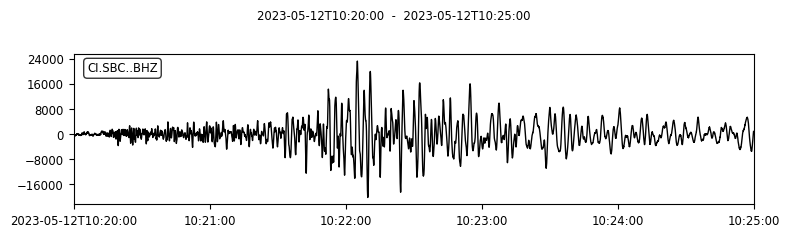

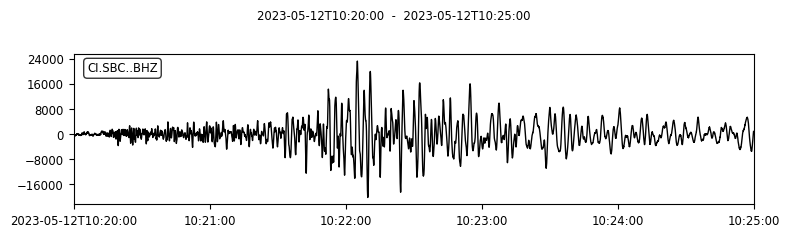

In [6]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import argrelmax
client = Client("IRIS")
t = UTCDateTime("2023-05-12T10:20:00.000")
st = client.get_waveforms("CI", "SBC", None, "BHZ", t, t + 60 * 5)
print(st)
st.plot()  

In [3]:
starttime = UTCDateTime("2004-12-25")
endtime = UTCDateTime("2004-12-27")
catalog = client.get_events(starttime=starttime, endtime=endtime,
                        minmagnitude=8)
origin = catalog[0].preferred_origin()
print(origin)

inventory = client.get_stations(starttime=starttime, endtime=endtime, longitude=origin.longitude, latitude=origin.latitude, maxradius=20)
print(inventory[3])

Origin
	   resource_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?originid=3788623")
	          time: UTCDateTime(2004, 12, 26, 0, 58, 52, 50000)
	     longitude: 95.9012
	      latitude: 3.4125
	         depth: 26100.0
	 creation_info: CreationInfo(author='ISC')
Network IU (Global Seismograph Network - IRIS/USGS (GSN))
	Station Count: 1/128 (Selected/Total)
	1988-01-01T00:00:00.000000Z - --
	Access: open
	Contains:
		Stations (1):
			IU.CHTO (Chiang Mai, Thailand)
		Channels (0):



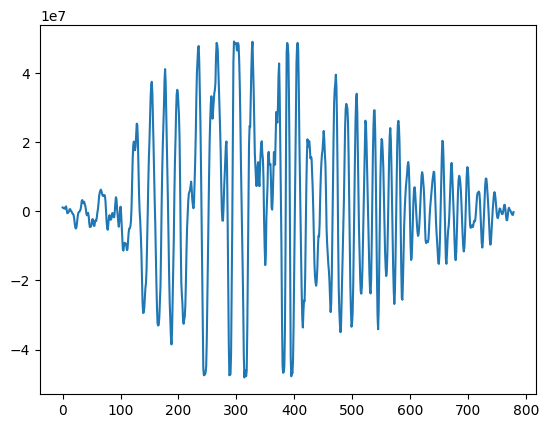

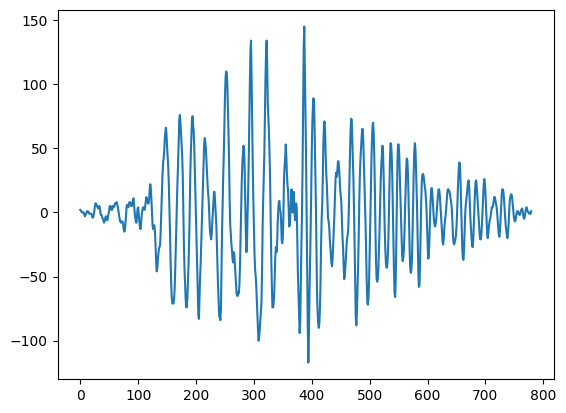

In [21]:
data = client.get_waveforms("IU", "CHTO", "00", "LHZ", origin.time + 60 * 7, origin.time + 60 * 20)
plt.plot(np.arange(len(data[0].data)), data[0].data)
plt.show()
filtered = data.filter("highpass", freq=0.02)
def scale(n):
    return round((n/50000000) * 100)
scaled = np.fromiter(map(scale, filtered[0].data), dtype=int)
plt.plot(np.arange(len(scaled)), scaled)
plt.show()

In [37]:
max = argrelmax(scaled)
plt.plot()

4
